In [1]:
import numpy as np
import pandas as pd
import math
import csv


from sklearn.model_selection import train_test_split
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import torch

In [3]:
house = pd.read_csv("house_prices.csv")
house

FileNotFoundError: [Errno 2] No such file or directory: 'house_prices.csv'

# Description of the Dataset

The dataset contains the house sale prices for King County. It also includes the homes sold between May 2014 and May 2015
**Each row of the dataset represents the houses that are for sale and that are sold between May 2014 and May 2015.** While Each **Column represents the features** of each homes. 
The dataset contains 21 columns which includes: 

**id** – A notation for a house

**date** – Date sold

**price** – Sale price

**bedrooms** – Number of bedrooms

**bathrooms** – Number of bathrooms

**sqft_living** – Size of living area in square feet

**sqft_lot** – Size of the lot in square feet

**floors** – Total floors in the house

**waterfront** – ‘1’ if the property has a waterfront, ‘0’ if not.

**view** – An index from 0 to 4 of how good the view of the property was.

**condition** – Condition of the house, ranked from 1 to 5

**grade** – Classification by construction quality which refers to the types of materials used 
and the quality of workmanship. Buildings of better quality (higher grade) cost more to 
build per unit of measure and command higher value.

**sqft_above** – Square feet above ground

**sqft_basement** – Square feet below ground

**yr_built** – Year built

**yr_renovated** – Year renovated. ‘0’ if never renovated

**zipcode** – 5-digit zip code

**lat** – Latitude coordinate

**long** – Longitude coordinate

**sqft_living15** – Average size of interior housing living space for the closest 15 houses, in 
square feet

**sqft_lot15** – Average size of land lots for the closest 15 houses, in square feet

In total, there are 21,613 instances in the dataset.

# Data Processing and Cleaning

**"Date sold": Column Cleaning**

In [3]:
# Since date column is encoded as datetime datatype, we separate the year and the month it was sold dropping the time

house['date'] = pd.to_datetime(house['date'])
house['year_sold'] = house['date'].dt.year
house['month_sold'] = house['date'].dt.month
house['day_sold'] = house['date'].dt.day

house.drop(columns='date', inplace=True)
house

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


In [4]:
house

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


We round up the numbers since there is no such thing as 0.75 of a bathroom that means it's just small.

### "Bathroom": Rounding up

In [5]:
house['num_bathrooms'] = house['bathrooms'].apply(lambda x: math.ceil(x))
house.drop(columns='bathrooms', inplace=True)
house

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,num_bathrooms
0,7129300520,221900.0,3,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,1
1,6414100192,538000.0,3,2570,7242,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,3
2,5631500400,180000.0,2,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,1
3,2487200875,604000.0,4,1960,5000,1.0,0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,3
4,1954400510,510000.0,3,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,1530,1131,3.0,0,0,3,8,...,0,98103,47.6993,-122.346,1530,1509,2014,5,21,3
21609,6600060120,400000.0,4,2310,5813,2.0,0,0,3,8,...,0,98146,47.5107,-122.362,1830,7200,2015,2,23,3
21610,1523300141,402101.0,2,1020,1350,2.0,0,0,3,7,...,0,98144,47.5944,-122.299,1020,2007,2014,6,23,1
21611,291310100,400000.0,3,1600,2388,2.0,0,0,3,8,...,0,98027,47.5345,-122.069,1410,1287,2015,1,16,3


### "Year Renovated": Boolean Approach

In [6]:
house['renovated'] = house['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
house

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,num_bathrooms,renovated
0,7129300520,221900.0,3,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,13,1,0
1,6414100192,538000.0,3,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,9,3,1
2,5631500400,180000.0,2,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,25,1,0
3,2487200875,604000.0,4,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,9,3,0
4,1954400510,510000.0,3,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,18,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,1530,1131,3.0,0,0,3,8,...,98103,47.6993,-122.346,1530,1509,2014,5,21,3,0
21609,6600060120,400000.0,4,2310,5813,2.0,0,0,3,8,...,98146,47.5107,-122.362,1830,7200,2015,2,23,3,0
21610,1523300141,402101.0,2,1020,1350,2.0,0,0,3,7,...,98144,47.5944,-122.299,1020,2007,2014,6,23,1,0
21611,291310100,400000.0,3,1600,2388,2.0,0,0,3,8,...,98027,47.5345,-122.069,1410,1287,2015,1,16,3,0


### "Year Renovated": Categorical Approach

In [7]:
house['renovation_status'] = house['yr_renovated'].apply(lambda x: 'Not Renovated' if x == 0 else str(x))
house

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,num_bathrooms,renovated,renovation_status
0,7129300520,221900.0,3,1180,5650,1.0,0,0,3,7,...,47.5112,-122.257,1340,5650,2014,10,13,1,0,Not Renovated
1,6414100192,538000.0,3,2570,7242,2.0,0,0,3,7,...,47.7210,-122.319,1690,7639,2014,12,9,3,1,1991
2,5631500400,180000.0,2,770,10000,1.0,0,0,3,6,...,47.7379,-122.233,2720,8062,2015,2,25,1,0,Not Renovated
3,2487200875,604000.0,4,1960,5000,1.0,0,0,5,7,...,47.5208,-122.393,1360,5000,2014,12,9,3,0,Not Renovated
4,1954400510,510000.0,3,1680,8080,1.0,0,0,3,8,...,47.6168,-122.045,1800,7503,2015,2,18,2,0,Not Renovated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,1530,1131,3.0,0,0,3,8,...,47.6993,-122.346,1530,1509,2014,5,21,3,0,Not Renovated
21609,6600060120,400000.0,4,2310,5813,2.0,0,0,3,8,...,47.5107,-122.362,1830,7200,2015,2,23,3,0,Not Renovated
21610,1523300141,402101.0,2,1020,1350,2.0,0,0,3,7,...,47.5944,-122.299,1020,2007,2014,6,23,1,0,Not Renovated
21611,291310100,400000.0,3,1600,2388,2.0,0,0,3,8,...,47.5345,-122.069,1410,1287,2015,1,16,3,0,Not Renovated


### "Floors": Rounding Up

In [8]:
house['num_floors'] = house['floors'].apply(lambda x: math.ceil(x))
house.drop(columns='floors', inplace=True)
house

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,...,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,num_bathrooms,renovated,renovation_status,num_floors
0,7129300520,221900.0,3,1180,5650,0,0,3,7,1180,...,-122.257,1340,5650,2014,10,13,1,0,Not Renovated,1
1,6414100192,538000.0,3,2570,7242,0,0,3,7,2170,...,-122.319,1690,7639,2014,12,9,3,1,1991,2
2,5631500400,180000.0,2,770,10000,0,0,3,6,770,...,-122.233,2720,8062,2015,2,25,1,0,Not Renovated,1
3,2487200875,604000.0,4,1960,5000,0,0,5,7,1050,...,-122.393,1360,5000,2014,12,9,3,0,Not Renovated,1
4,1954400510,510000.0,3,1680,8080,0,0,3,8,1680,...,-122.045,1800,7503,2015,2,18,2,0,Not Renovated,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,1530,1131,0,0,3,8,1530,...,-122.346,1530,1509,2014,5,21,3,0,Not Renovated,3
21609,6600060120,400000.0,4,2310,5813,0,0,3,8,2310,...,-122.362,1830,7200,2015,2,23,3,0,Not Renovated,2
21610,1523300141,402101.0,2,1020,1350,0,0,3,7,1020,...,-122.299,1020,2007,2014,6,23,1,0,Not Renovated,2
21611,291310100,400000.0,3,1600,2388,0,0,3,8,1600,...,-122.069,1410,1287,2015,1,16,3,0,Not Renovated,2


In [9]:
house['grade_con'] = house['grade'].astype(int) + house['condition'].astype(int)
house

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,...,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,num_bathrooms,renovated,renovation_status,num_floors,grade_con
0,7129300520,221900.0,3,1180,5650,0,0,3,7,1180,...,1340,5650,2014,10,13,1,0,Not Renovated,1,10
1,6414100192,538000.0,3,2570,7242,0,0,3,7,2170,...,1690,7639,2014,12,9,3,1,1991,2,10
2,5631500400,180000.0,2,770,10000,0,0,3,6,770,...,2720,8062,2015,2,25,1,0,Not Renovated,1,9
3,2487200875,604000.0,4,1960,5000,0,0,5,7,1050,...,1360,5000,2014,12,9,3,0,Not Renovated,1,12
4,1954400510,510000.0,3,1680,8080,0,0,3,8,1680,...,1800,7503,2015,2,18,2,0,Not Renovated,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,1530,1131,0,0,3,8,1530,...,1530,1509,2014,5,21,3,0,Not Renovated,3,11
21609,6600060120,400000.0,4,2310,5813,0,0,3,8,2310,...,1830,7200,2015,2,23,3,0,Not Renovated,2,11
21610,1523300141,402101.0,2,1020,1350,0,0,3,7,1020,...,1020,2007,2014,6,23,1,0,Not Renovated,2,10
21611,291310100,400000.0,3,1600,2388,0,0,3,8,1600,...,1410,1287,2015,1,16,3,0,Not Renovated,2,11


# Exploratory Data Analysis

In [10]:
unique_values = house['num_floors'].unique()
print(unique_values)

[1 2 3 4]


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


## 1) Sale Prices

The numerical analysis of the sale prices reveals a positively skewed distribution, supported by a mean of approximately 540,088.1, which is higher than the median of 450,000. The interquartile range (IQR), spanning from 321,950 (25th percentile) to 645,000 (75th percentile), signifies a concentration of sale prices within this range. The presence of a maximum value of 7,700,000 suggests potential outliers in higher-priced properties.


In [12]:
# Numerical Summaries

saleprice_numsum = house['price'].describe()
print(saleprice_numsum)


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


Plotting the histogram of Sale Prices is fundamental in our exploratory data analysis (EDA) for several reasons. Firstly, it provides a visual representation of the distribution of sale prices, helping us understand the overall shape of the data. This also aids in identifying the central tendency of sale prices, indicating where values are concentrated. Additionally, histograms allow us to assess the spread of sale prices, providing insights into the variability and range of the data. Furthermore, the histogram might unveil any potential outliers or unusual patterns, guiding us in further data exploration and influencing decisions on data preprocessing and analysis techniques. 

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

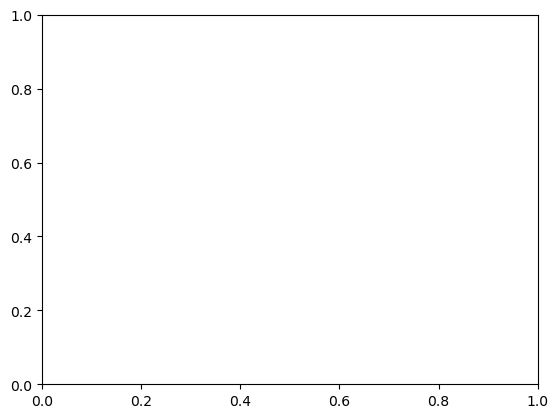

In [2]:
# Histogram of Sale Prices

plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
sns.histplot(house['price'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.xlim(0,5000000)
plt.show()

The Sale Prices in the dataset exhibits a positively skewed distribution, with the central tendency clustered around 0.5. The prices show a concentration after the peak at x = 0.5, suggesting a narrow range of values with an exponential decrease in frequency. After passing a sale price value of 1, we can observe that the graph continuously go smaller and smaller, approaching zero as the sale price go further in value. The distribution is notably right-skewed, indicating a tail extending to the right. Patterns and anomalies are present, allowing further exploration of clusters at specific intervals.

## 2) Correlation Matrix

The correlation matrix is crucial for our EDA as it illustrates the strength and direction of relationships between variables, guiding the understanding of how features interact. It helps in identifying patterns and potential multicollinearity. Additionally, the correlation matrix provides valuable insights into the dataset's structure, informing hypothesis formulation and supporting decision-making for modeling strategies.

C:\Users\Calvin\AppData\Local\Temp\ipykernel_14340\1712340175.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl_matrix = house.corr()


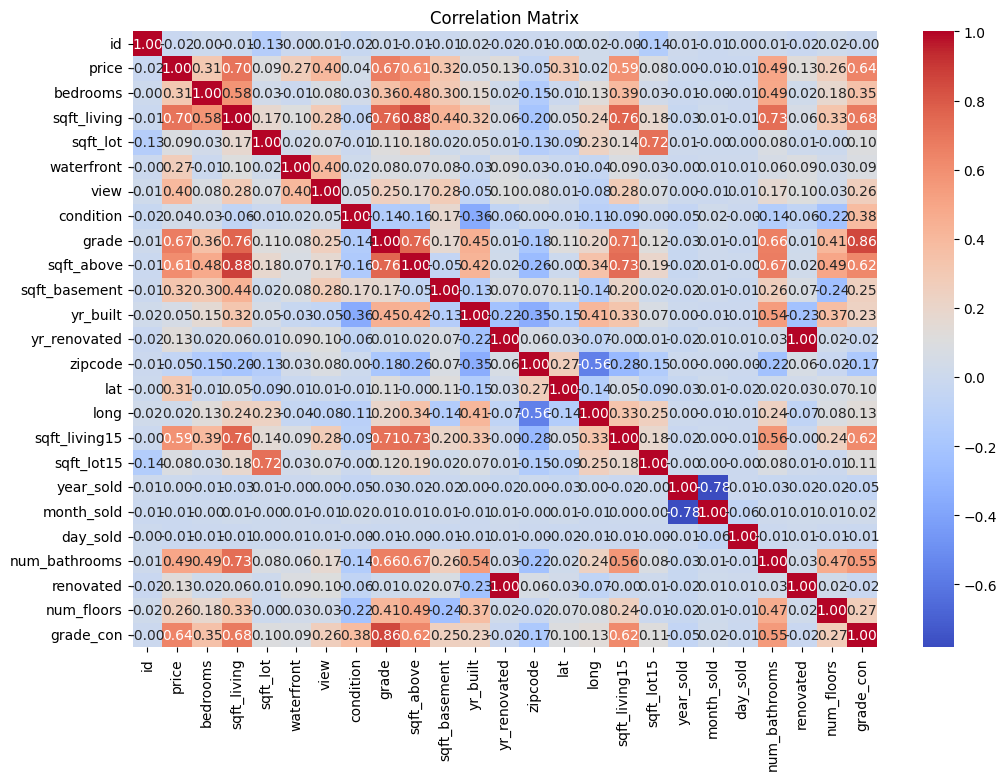

                   id month_sold day_sold year_sold     price  bedrooms  \
id             Strong       Weak     Weak      Weak      Weak      Weak   
month_sold       Weak     Strong     Weak      Weak      Weak      Weak   
day_sold         Weak       Weak   Strong      Weak      Weak      Weak   
year_sold        Weak       Weak     Weak    Strong      Weak      Weak   
price            Weak       Weak     Weak      Weak    Strong  Moderate   
bedrooms         Weak       Weak     Weak      Weak  Moderate    Strong   
num_bathrooms    Weak       Weak     Weak      Weak  Moderate  Moderate   
sqft_living      Weak       Weak     Weak      Weak    Strong  Moderate   
sqft_lot         Weak       Weak     Weak      Weak      Weak      Weak   
waterfront       Weak       Weak     Weak      Weak      Weak      Weak   
view             Weak       Weak     Weak      Weak  Moderate      Weak   
condition        Weak       Weak     Weak      Weak      Weak      Weak   
grade            Weak    

In [14]:
correl_matrix = house.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correl_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

selected_cols = ['id', 'month_sold', 'day_sold', 'year_sold', 'price', 'bedrooms', 'num_bathrooms', 'sqft_living', 
                 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
                 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Strong (value >= 0.7)
# Moderate (value <= 0.7)
correl_matrix = house[selected_cols].corr()

def categorize_correlation(value):
    if value >= 0.7:
        return 'Strong'
    elif 0.3 <= abs(value) < 0.7:
        return 'Moderate'
    else:
        return 'Weak'

correl_categories = correl_matrix.applymap(categorize_correlation)
print(correl_categories)


The correlation matrix reveals varying degrees of association between different pairs of variables in the dataset. Strong correlations are observed between features such as sqft_living and sqft_above, as well as sqft_living and sqft_living15. Moderate correlations exist between price and sqft_living, bedrooms and grade, and other pairs, providing insights into potential influential relationships within the dataset.

## 3) Living Area vs. Sale Price

Comparing Living Area and Sale Price is significant in our EDA as it reveals the relationship between the size of the living space and property values, providing insights into key factors influencing real estate prices. This comparison informs pricing strategies, aids in feature selection for predictive modeling, and supports decision-making for both real estate professionals and potential buyers by offering valuable insights into market dynamics and property values.

In [15]:
# Numerical Summaries

livarea_mean = house['sqft_living'].mean()
livarea_med = house['sqft_living'].median()
livarea_std = house['sqft_living'].std()

saleprice_mean = house['price'].mean()
saleprice_med = house['price'].median()
saleprice_std = house['price'].std()

correl_coeff = house['sqft_living'].corr(house['price'])

print(f"Living Area Stats - Mean: {livarea_mean:.2f}, Median: {livarea_med:.2f}, Std Dev: {livarea_std:.2f}")
print(f"Sale Price Stats - Mean: {saleprice_mean:.2f}, Median: {saleprice_med:.2f}, Std Dev: {saleprice_std:.2f}")
print(f"Correlation Coefficient between Living Area and Sale Price: {correl_coeff:.2f}")


Living Area Stats - Mean: 2079.90, Median: 1910.00, Std Dev: 918.44
Sale Price Stats - Mean: 540088.14, Median: 450000.00, Std Dev: 367127.20
Correlation Coefficient between Living Area and Sale Price: 0.70


The mean Living Area is approximately 2,079.90 square feet, with a median of 1,910.00 square feet and a standard deviation of 918.44 square feet. The Sale Price has a mean of 540,088.14, a median of 450,000.00, and a standard deviation of 367,127.20. The correlation coefficient between Living Area and Sale Price is 0.70, indicating a strong positive correlation.

<Figure size 1000x600 with 0 Axes>

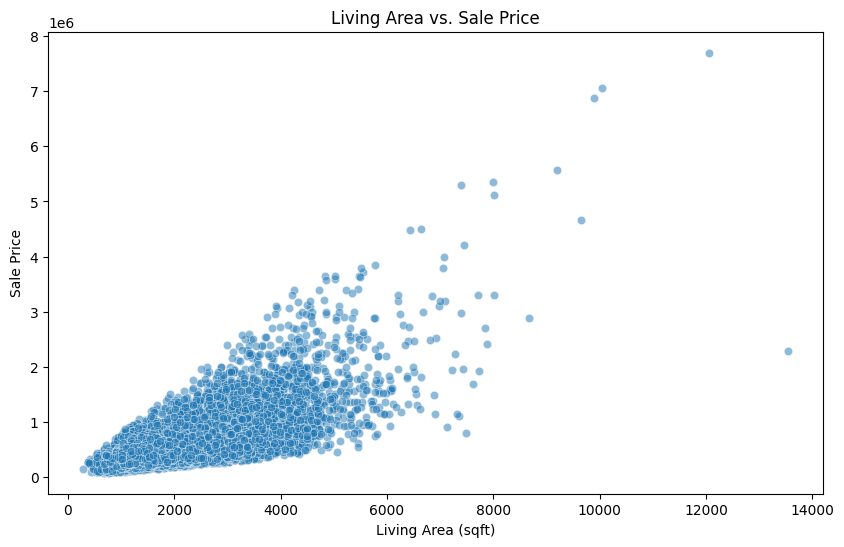

In [16]:
# Scatter plot of Living Area vs. Sale Price

plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
sns.scatterplot(x='sqft_living', y='price', data=house, alpha=0.5)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.title('Living Area vs. Sale Price')

plt.xlim(0,8000)
plt.ylim(0,4000000)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.show()

Since it has a strong positive correlation, it is expected to have a positively sloped scatter plot, which we did. As Living Area increases, Sale Price tends to increase as well. The data points are expected to cluster in a manner that suggests a clear trend, emphasizing the impact of living space size on property values. This pattern indicates that Living Area has a substantial influence on Sale Prices in the dataset.

## 4) Grade vs. Sale Price

Comparing values of Grade vs. Sale Price is important as it visually reveals how the construction quality, represented by Grade, impacts property values. This comparison helps identify variations, outliers, and trends in Sale Prices across different Grade levels, providing valuable insights for pricing strategies and decision-making in the real estate market. Additionally, the analysis aids in determining the relevance of Grade as a feature in predictive modeling, contributing to the development of accurate pricing models.

In [17]:
# Numerical Summaries

grades = sorted(house['grade'].unique())
grade_summaries = []

for grade in grades:
    prices_for_grade = house[house['grade'] == grade]['price']
    
    median_price = prices_for_grade.median()
    q1 = prices_for_grade.quantile(0.25)
    q3 = prices_for_grade.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = prices_for_grade[(prices_for_grade < lower_bound) | (prices_for_grade > upper_bound)]
    
    grade_summaries.append({
        'Grade': grade,
        'Median Price': median_price,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Potential Outliers': outliers.tolist()
    })

box_plot_summary = pd.DataFrame(grade_summaries)

print(box_plot_summary)


    Grade  Median Price         Q1         Q3        IQR  \
0       1      142000.0   142000.0   142000.0        0.0   
1       3      262000.0   168500.0   271000.0   102500.0   
2       4      205000.0   145000.0   265000.0   120000.0   
3       5      228700.0   175000.0   295750.0   120750.0   
4       6      275276.5   215037.5   366837.5   151800.0   
5       7      375000.0   285000.0   485000.0   200000.0   
6       8      510000.0   390000.0   640000.0   250000.0   
7       9      720000.0   571500.0   880000.0   308500.0   
8      10      914327.0   768087.5  1250000.0   481912.5   
9      11     1284000.0  1036000.0  1700000.0   664000.0   
10     12     1817500.0  1500000.0  2668500.0  1168500.0   
11     13     2983000.0  2415000.0  3800000.0  1385000.0   

                                   Potential Outliers  
0                                                  []  
1                                                  []  
2                                                  

The numerical summaries for the box plot of Grade vs. Sale Price reveal distinct patterns across different Grade levels. Grades 1, 3, and 4 exhibit minimal variation with identical or closely grouped Sale Prices. As Grade increases from 5 to 12, there is a noticeable rise in both median Sale Prices and the spread of prices, indicating a positive correlation between construction quality and property values.

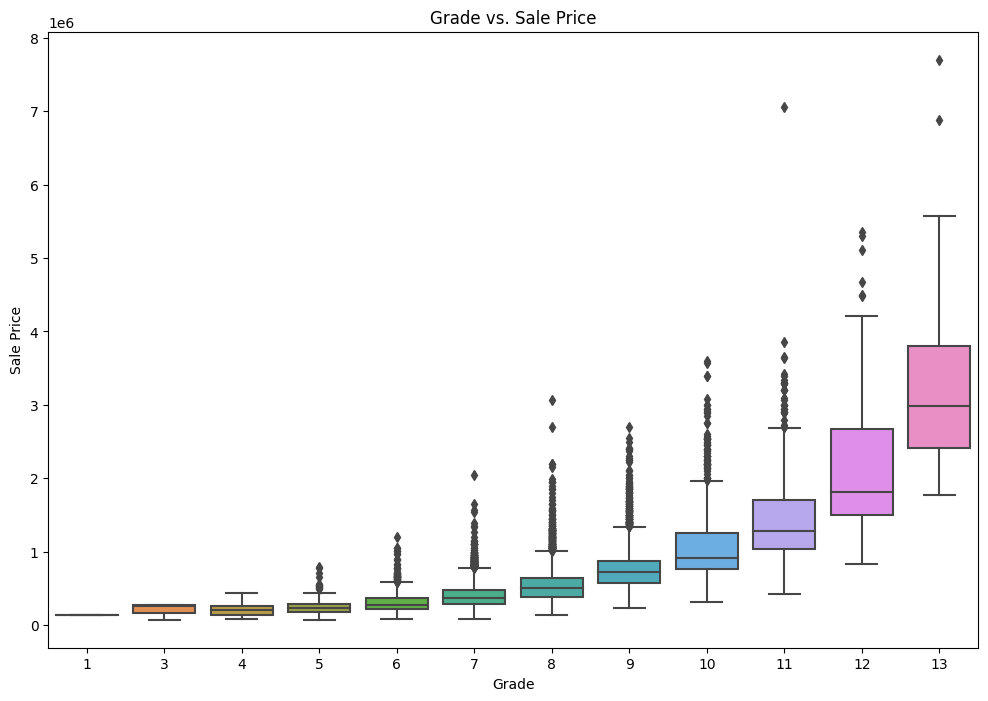

In [18]:
# Box plot of Grade vs. Sale Price

plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', data=house)
plt.title('Grade vs. Sale Price')
plt.xlabel('Grade')
plt.ylabel('Sale Price')
plt.show()


As expected from the numerical summaries plot reveals a tight cluster of Sale Prices with little variability at Grades 1, 3, and 4. At the same time, as Grade increases from 5 to 12, there is a clear upward shift in the central tendency, indicating a positive association between construction quality and property values. The expanding spread of Sale Prices in higher-grade categories, along with the identification of potential outliers, suggests a diverse range of property values, including luxury real estate within those specific grade levels.

# Model Training

**Training and Testing: Linear Regression**

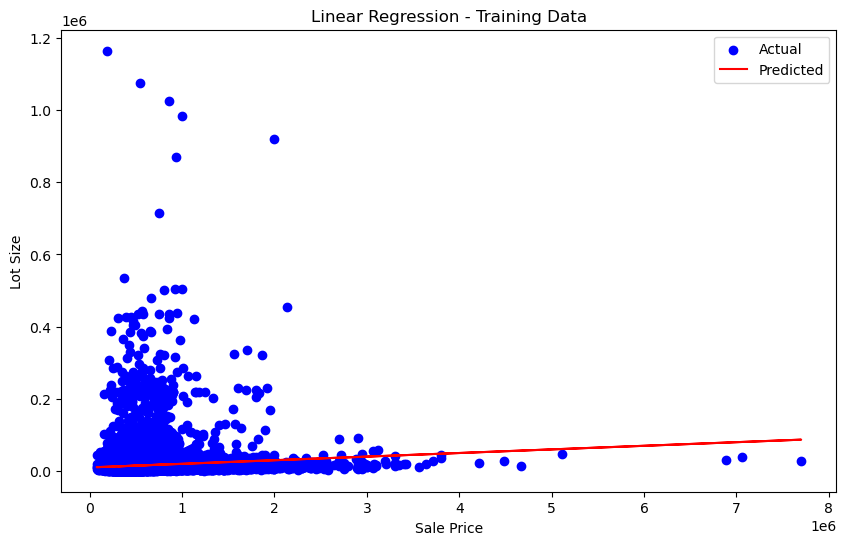

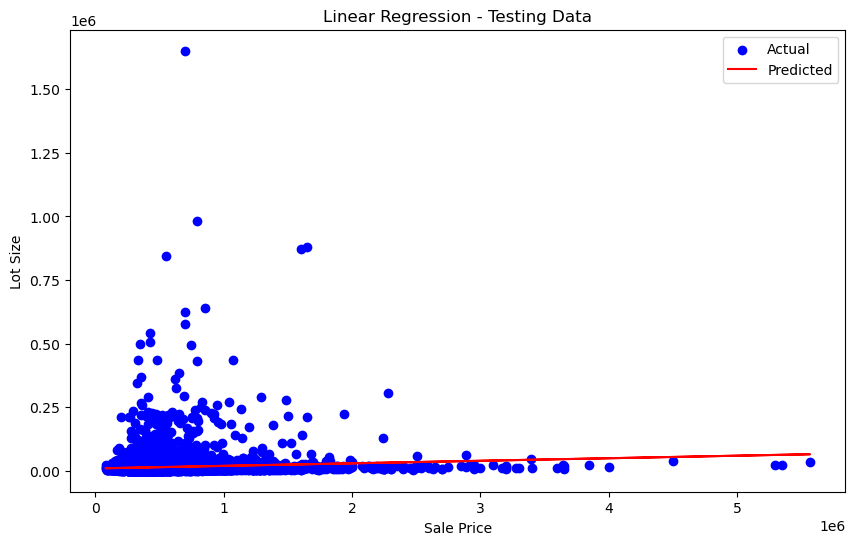

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Getting sqft_lot as our feature in determining price 
X = house[['price']]
y = house['sqft_lot']

# Splitting the dataset into training and testing sets with 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Visualizing the training results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.title('Linear Regression - Training Data')
plt.xlabel('Sale Price')
plt.ylabel('Lot Size')
plt.legend()
plt.show()

# Visualizing the testing results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', label='Predicted')
plt.title('Linear Regression - Testing Data')
plt.xlabel('Sale Price')
plt.ylabel('Lot Size')
plt.legend()
plt.show()


we use the features price and sqft_lot for linear regression and the regression line passes through the points but there are points that are far from the regression line


**Training and Testing: Polynomial Regression**

for polynomial regression we added the values of grade and condition since we believe that the quality of the materials used and its current condition correlates to the value of a house. we use price for x and the added values of grade and conditon for the value of y.

Root Mean Squared Error (RMSE) - Training: 0.93
Root Mean Squared Error (RMSE) - Testing: 0.91


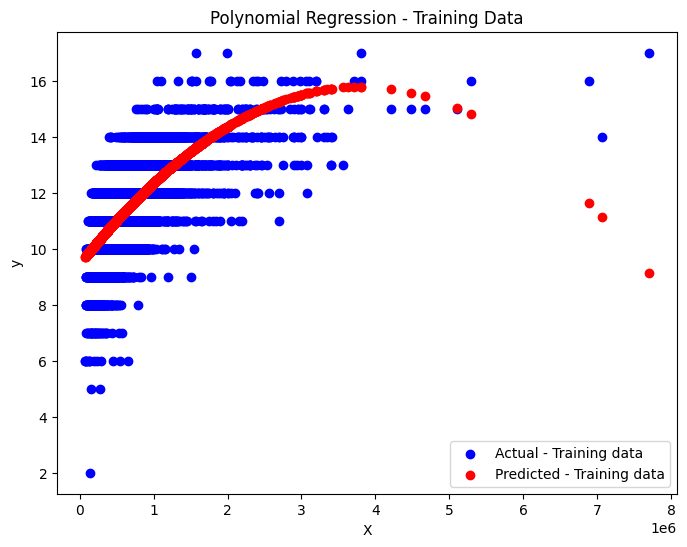

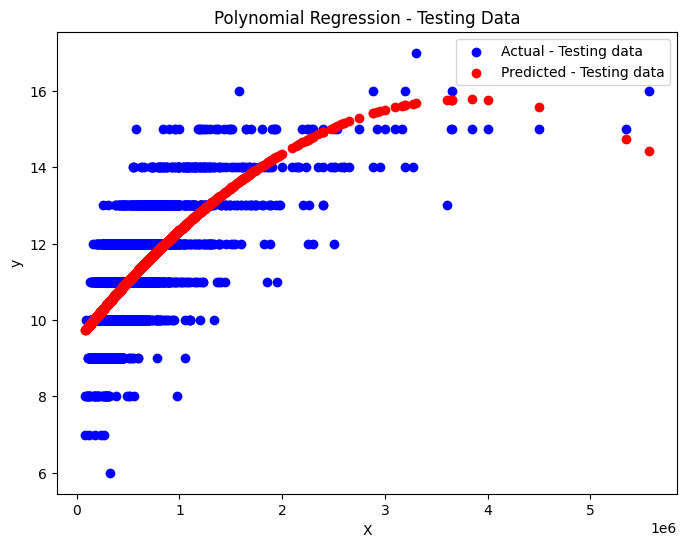

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the dataset

# Extracting features and target variable
X = house[['price']]
y = house['grade_con']

# Splitting the dataset into training and testing sets with 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Polynomial transformation of the features
degree = 2  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Creating and fitting the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predictions on training and testing data
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

# Calculating the RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE) - Training: {rmse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) - Testing: {rmse_test:.2f}")

# Visualizing the training results
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual - Training data')
plt.scatter(X_train, y_pred_train, color='red', label='Predicted - Training data')
plt.title('Polynomial Regression - Training Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Visualizing the testing results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual - Testing data')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted - Testing data')
plt.title('Polynomial Regression - Testing Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


the RMSE for Training: 0.93 and the RMSE for Testing: 0.91. showing that the performance of the model is good since its value is low. as for the graph we can see that the predicted values' points touch the actual values' points and not that far from one another which is another indicator that the performance is relatively good

**Training and Testing: KNN**

For KNN we drop the renovation status since we already have a column that indicates 1 if the house has been already renovated and 0 if the house is not renovated which makes the renovation_status redundant

In [21]:
house_temp = house
house_temp.drop(columns=['renovation_status'], inplace=True)


for KNN we classify the houses based on the number of floors given the grade of materials used and the current condition of the house

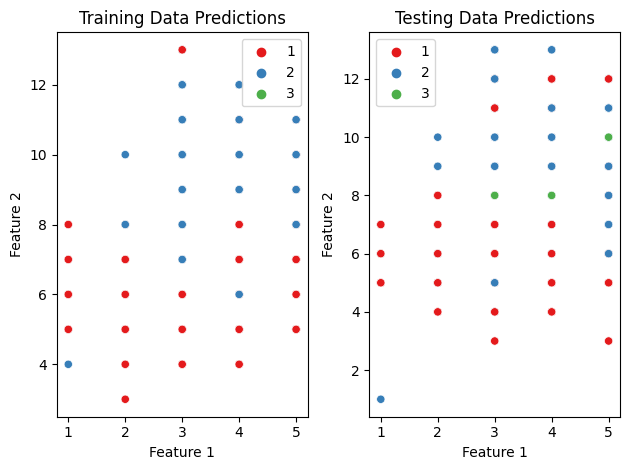

Training Accuracy: 0.8243
Testing Accuracy: 0.6548


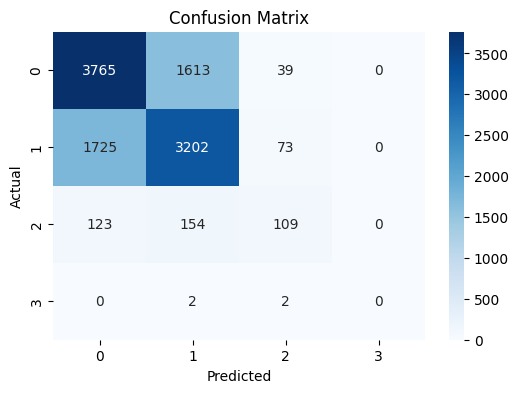

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


# Assuming 'X' contains the features and 'y' contains the target variable
X = house_temp.drop('num_floors', axis=1)  # Replace 'target_column' with your target column name
y = house_temp['num_floors']

# Splitting the dataset into training and testing sets with 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN model (you can adjust the hyperparameters here)
knn = KNeighborsClassifier(n_neighbors=3)  

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the training and testing data
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

# Visualizing training results
#plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train['condition'], y=X_train['grade'], hue=train_predictions, palette='Set1')
plt.title('Training Data Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualizing testing results
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['condition'], y=X_test['grade'], hue=test_predictions, palette='Set1')
plt.title('Testing Data Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Display confusion matrix for testing set
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


we use confusion matrix to see accuracy of the predictions (true positive, false

In [24]:
house_temp

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,...,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,num_bathrooms,renovated,num_floors,grade_con
0,7129300520,221900.0,3,1180,5650,0,0,3,7,1180,...,-122.257,1340,5650,2014,10,13,1,0,1,10
1,6414100192,538000.0,3,2570,7242,0,0,3,7,2170,...,-122.319,1690,7639,2014,12,9,3,1,2,10
2,5631500400,180000.0,2,770,10000,0,0,3,6,770,...,-122.233,2720,8062,2015,2,25,1,0,1,9
3,2487200875,604000.0,4,1960,5000,0,0,5,7,1050,...,-122.393,1360,5000,2014,12,9,3,0,1,12
4,1954400510,510000.0,3,1680,8080,0,0,3,8,1680,...,-122.045,1800,7503,2015,2,18,2,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,1530,1131,0,0,3,8,1530,...,-122.346,1530,1509,2014,5,21,3,0,3,11
21609,6600060120,400000.0,4,2310,5813,0,0,3,8,2310,...,-122.362,1830,7200,2015,2,23,3,0,2,11
21610,1523300141,402101.0,2,1020,1350,0,0,3,7,1020,...,-122.299,1020,2007,2014,6,23,1,0,2,10
21611,291310100,400000.0,3,1600,2388,0,0,3,8,1600,...,-122.069,1410,1287,2015,1,16,3,0,2,11


# Model Selection

**Linear Regression**

We have chosen Linear Regression for the house dataset since we are dealing with continous values such as lot size to sale price because it is also easy to assume its linearality since in real life almost all lot size is linearly proprtional to its size it would just vary in the lot's location. Linear regression can highlight the importance of different features in predicting house prices through the coefficients assigned to each feature. This can help in identifying which features have a more significant impact on house prices

For linear Regression we played around with the parameter of fit_intercept where fit_intercept was equal to true or false but we have decidided to go with assigning fit_intercept as true since when it was set to false it did not account for the bias in computation and assumes that our data was perfectly proportionate. The advantage of using a linear regression model over the other in the context of house_price dataset was it is simple and easy to interpret. 

**Polynomial Regression**

The group has chosen a polynomial regression approach for the second model since in the polyfit method it captures non-linear relationships, in our example where we took the price as our feature and the combination of grade and condition as our label. The group selected the following features since the idea that the grade of materials used and the condition of the house has a relationship with the selling price.

**K-Nearest Neighbors**

We selected KNN for the classification task of predicting the number of floors in the house dataset. We believe KNN is a suitable choice when dealing with categorical outcomes, and in our case, predicting the discrete number of floors falls into this category. The algorithm makes predictions based on the majority class among its k-nearest neighbors, providing an intuitive approach to classification.

The hyperparameters selected for KNN included n_neighbors=3, determining the number of neighbors to consider during classification. This parameter was chosen based on experimentation/"trial-and-error" and tuning to achieve optimal performance. n_neighbors=1 seemed to produce 100% accuracy on the training data set, while n_neighbors=5, gave a very low accuracy. The dataset was split into training and testing sets using test_size=0.2 to assess the model's generalization capabilities.

The evaluation of the KNN model included visualizing training and testing results through scatter plots, illustrating the predicted number of floors based on features. Accuracy scores and a confusion matrix were computed to quantify the model's performance on both sets. KNN's superiority lies in its simplicity, flexibility, and adaptability to diverse datasets, not assuming a specific data distribution.

# Insights & Conclusions

Based on the results the Polynomial Regression Model had the highest predictive ability compared to the other two.

On the 3 models, linear regression worked well enough, although there are room for improvements as it doesn't accurately describe the complex relationship between the grade condition and the price as a line doesn't show off the best predictive ability, this is where the polynomial regression model comes in, as the relationship between the house features aren't as clear or as linear as some of the other features, like the strong correlation between price to living space. The last model kNN, didn't perform as well as the other 2 with a testing accuracy of only 0.65 approx, this low accuracy may be due to the data having a lot of overlap in the results, which makes kNN a non optimal model to use. 

For better results in the models using and comparing different features may have a better impact on the training especially in the kNN model. Adding new columns that combine multiple other features may also result in clearer relationships as a lot of the features correspond to similar categories

In summary, the Polynomial Regression model worked the best among the three, due to the model's non linearity it allows for a more accurate predictive ability than a linear one.

# References

Sklearn.linear_model.linearregression. scikit. (n.d.-a). https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

Sklearn.neighbors.kneighborsclassifier. scikit. (n.d.-b). https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 